# Analisando a Violência no Rio de Janeiro

O Rio de Janeiro, conhecida como a cidade maravilhosa, é um dos maiores centros turísticos do País, entretanto, na prática, o Estado vem tendo altos índices de violência e tráfico.

Segundo relatório de dados obtidos de estatística internacional a Unifesp concluiu que o Brasil só perdia em consumo de Cocaína para os Estados Unidos tem 4,8 taxa de mortes para cada grupo de 100 mil habitantes, enquanto que o Brasil tem 31.1 pessoas a cada 100 mil habitantes, uma diferença enorme.

E como se sabe, quase todas as metropoles do mundo possuem comércio ilegal de drogas, entretanto o Rio é uma das cidades que frequentemente se presencia cenas de Guerras nas ruas, conflitos oriundos de facções armadas - lutas pelo controle de territórios, tais problemas cresceram e se intensificaram com o passar do tempo devido a corrupção e o descaso dos governantes para com as favelas cariocas - atualmente, reféns dessas faccções.

Sabe-se também que o Rio de Janeiro não consegue mais prover segurança para a sua população de forma eficiente, o que é prejudicial para o turismo, além de proporcionar um medo para toda a sua sociedade, dito isso, passaremos a investigar alguns dados.


 # OBTENÇÃO DOS DADOS

Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro. (https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

As estatisfica que foram divulgadas são oriundas de Registros de Ocorrência lavrados pela Policia Civil do Estado do Rio de Janeiro, sendo complementada com outros órgãos especificos da Policia Militar do Rio de Janeiro.



# Importando os Dados

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

# Análise Inicial dos Dados

Neste momento iremos percorrer um pouco os dados, descobrindo as 5 primeiras linhas, em seguida, iremos analisar o tamanho do dataset e os tipos contidos nas colunas.

Visto isto, verificaremos o nome das colunas, bem como a porcentagem de valores ausentes em cada coluna.

A seguir, você notara que há uma grande quantidade de valores ausentes em alguns delitos que prejudicam a visualização dos dados, duas colunas com grande quantidade: Roubo de Bicicleta e Furto de Bicicleta - Valores consideraveis por sinais.

In [4]:
dataset.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [5]:
dataset.shape

(344, 56)

In [6]:
dataset.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [7]:
dataset.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [8]:
dataset.isnull().sum()/dataset.shape[0]

vano                          0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.279070
latrocinio                    0.000000
hom_por_interv_policial       0.244186
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.418605
hom_culposo                   0.244186
lesao_corp_culposa            0.279070
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_transeunte              0.000000
roubo_em_coletivo             0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.418605
roubo_celular                 0.313953
roubo_conducao_saque          0.418605
roubo_apos_saque              0.418605
roubo_bicicleta               0.802326
outros_roubos                 0.000000
total_roubos                  0.000000
furto_veiculos           

# Informações Estatísticas da Violência no Rio de Janeiro

Neste momento, iremos investigar as colunas relacionadas ao roubo de veículo, furto e recuperação e fazer um comparativo das médias.

Aqui usaremos o describe para obter as médias dos valores, assim, as colunas "vano" e "mes" devem ser desconsideradas

In [9]:
dataset.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,...,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,...,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,...,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,...,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,...,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,...,427.000000,60.500000,3.000000,2.000000,0.00000,590.000000,4190.000000,2322.000000,54926.500000,3.000000
75%,2012.000000,9.000000,577.250000,6.000000,19.000000,96.25000,398.250000,6582.500000,441.250000,236.250000,...,481.500000,87.000000,4.000000,3.000000,1.00000,649.000000,6872.750000,2778.000000,63292.500000,3.000000
max,2019.000000,12.000000,831.000000,21.000000,36.000000,194.00000,645.000000,9050.000000,561.000000,449.000000,...,628.000000,217.000000,13.000000,10.000000,3.00000,848.000000,13833.000000,5358.000000,75403.000000,3.000000


In [10]:
# ver a média da variável roubo_veiculo
rouboVeiculo = dataset.roubo_veiculo.mean()
print(rouboVeiculo)

2448.6976744186045


In [11]:
# ver a média da variável furto_veiculos
furtoVeiculo = dataset.furto_veiculos.mean()
print(furtoVeiculo)

1674.671511627907


In [12]:
# ver a média da variável recuperacao_veiculos
recuperadoVeiculo = dataset.recuperacao_veiculos.mean()
print(recuperadoVeiculo)

1772.2383720930231


In [13]:
# ver a porcentagem de carros recuperados em relação aos carros roubados + carros furtados
print (recuperadoVeiculo / (rouboVeiculo + furtoVeiculo))

0.42980346705075084


In [14]:
# valores max e min de hom_doloso
homMax = max(dataset.hom_doloso)
homMin = min(dataset.hom_doloso)
print(f'Max: {homMax} \nMin: {homMin}' )

Max: 831 
Min: 272


In [15]:
#Verificando os anos com os valores Max e Min
anoMaxHom = dataset.query('hom_doloso == 831')
anoMinHom = dataset.query('hom_doloso == 272')

print(f'Maior ano com Homicidio Doloso: {anoMaxHom["vano"]} \nMenor ano com Homicidio doloso: {anoMinHom["vano"]}')

Maior ano com Homicidio Doloso: 48    1995
Name: vano, dtype: int64 
Menor ano com Homicidio doloso: 293    2015
Name: vano, dtype: int64


In [23]:
rouboColetivoMax = max(dataset.roubo_em_coletivo)
rouboColetivoMin = min(dataset.roubo_em_coletivo)
print(f'max: {rouboColetivoMax} \nmin: {rouboColetivoMin}')


max: 1628 
min: 281


In [30]:
anoMaxRouboCol = dataset.query('roubo_em_coletivo == 1628')
anoMinRouboCol = dataset.query('roubo_em_coletivo == 281')

print(f'Maior ano com roubo em coletivo: {anoMaxRouboCol["vano"]} \nMenor ano com roubo em coletivo: {anoMinRouboCol["vano"]}')

Maior ano com roubo em coletivo: 319    2017
Name: vano, dtype: int64 
Menor ano com roubo em coletivo: 8    1991
Name: vano, dtype: int64


In [37]:
encontroCadaverMax = max(dataset.encontro_cadaver)
encontroCadaverMin = min(dataset.encontro_cadaver)

print(f'max: {encontroCadaverMax} \nmin: {encontroCadaverMin}')

max: 217 
min: 0


In [39]:
anoMaxCadaverCol = dataset.query('encontro_cadaver == 217')
anoMinCadaverCol = dataset.query('encontro_cadaver == 0')

print(f'Maior ano com roubo em coletivo: {anoMaxCadaverCol["vano"]} \nMenor ano com roubo em coletivo: {anoMinCadaverCol["vano"]}')

Maior ano com roubo em coletivo: 0    1991
Name: vano, dtype: int64 
Menor ano com roubo em coletivo: 78    1997
79    1997
80    1997
81    1997
82    1997
83    1997
Name: vano, dtype: int64


# VISUALIZAÇÃO DE DADOS

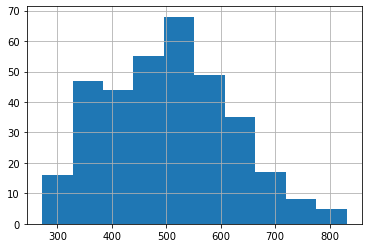

In [17]:
dataset['hom_doloso'].hist();

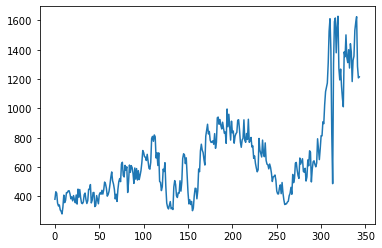

In [18]:
dataset['roubo_em_coletivo'].plot();

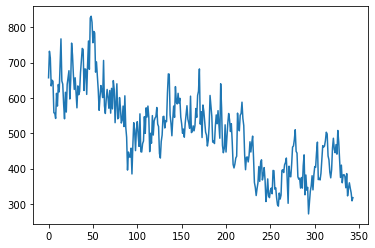

In [41]:
dataset['hom_doloso'].plot();

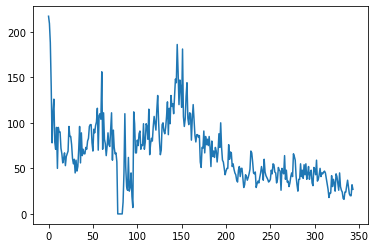

In [40]:
dataset['encontro_cadaver'].plot();

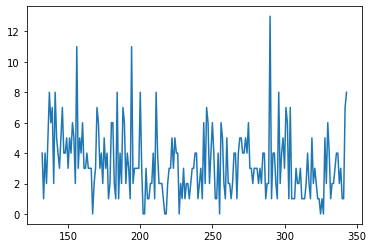

In [44]:
dataset['encontro_ossada'].plot();

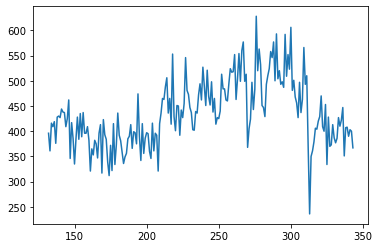

In [45]:
dataset['pessoas_desaparecidas'].plot();

# CONCLUSÃO

Em análise ao dataset observar-se que, o número de homicídios caíram com o passar do tempo, entretanto, nota-se que o encontro de cadáver decaiu em conjunto, o que, consequentemente pode influenciar em tais dados, os recursos disponíveis para a polícia são poucos, o que prejudica muito as investigações, além, claro, do descaso dos governadores e seu histórico de corrupção na Rio de Janeiro.

Em observância aos dados, o maior número de homicídios dolosos ocorreu no período de 1995, totalizando o total de 831, após isso os números foram caindo, sendo 2015 com o menor números de ocorrências, total de 272.

Indo um pouco mais adiante é possível notar no gráfico que o número de pessoas desaparecidas decaiu, após um longo tempo de uma linha crescente.

Por fim, o número de roubo em coletivos continua a subir, tendo um pico de 1628 em 2017 ou seja, ficando a cidade mais perigosa para cidadãos que utilizam o transporte público e turistas que se preciso utilizam o mesmo modal, que antigamente - 1991, ano em que se encontra o menor número de roubo em coletivos, totalizando 281.

Com face no exposto, é possível perceber que o número de homicídios caiu com o passar do tempo, o que afetou diretamente o número de ossadas e número de pessoas desaparecidas, entretanto, não se pode olvidar o aumento alarmante de roubo em coletivo torna-se uma cidade bastante perigosa, conforme o Sindicato das Empresas de Ônibus - em reportagem a CNN, o número de pessoas que utilizam o este tipo de modal equivale, após pandemia 1,8 milhão, antes da pandemia eram 3,5 milhões de pessoas, tendo o Rio de Janeiro 6,748 milhões de pessoas.



